# AsciiToImage
This Program will help us generate an img from the canvas.txt generated with the Image2Ascii. It is too easy doing it mannually in photoshop but this way we can create an img version automatically


In [8]:
from PIL import Image, ImageDraw, ImageFont
import os
import matplotlib.pyplot as plt

In [9]:
path = os.getcwd()

file = open(path + '/out/canvas.txt').read()
img = Image.open(path+'/in/modus.jpg') #imgin.jpg
#calculate the expansion ratios for the chars
resolution = 1
(imgW, imgH) = img.size
charW = len(file.splitlines()[0])
charH = len(file.splitlines())
ratioCW = 17*resolution
ratioCH = 34*resolution
print('ratio original: '+str(imgW/imgH))
print('ratio canvas: '+str((charW*ratioCW)/(charH*ratioCH)))

ratio original: 1.0
ratio canvas: 1.0


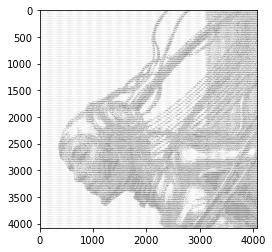

In [10]:
#create the canvas
blankImg = Image.new('RGB',(charW*ratioCW,charH*ratioCH), (255,255,255))
plt.imshow(blankImg)

# font
font = ImageFont.truetype('consola', 30)
#draw
draw = ImageDraw.Draw(blankImg)

for line,i in zip(file.splitlines(),range(0,len(file.splitlines()))):
    draw.text((0, (ratioCH)*i),line, (0,0,0), font = font)
    

plt.imshow(blankImg)
blankImg.save('test.jpg')

#### Ahora que ya lo tenemos todo bien cuadradito vamos a darle buena forma de funcion para posteriormente hecerlo .py

In [11]:
from PIL import Image, ImageDraw, ImageFont
import os

In [12]:
# decided to avoid the resolution param bc adjusting the font size would be a mess
def asciiToImg(txt_path, out_path, background_color = (255,255,255), font_color = (0,0,0), font_path = 'consola'):
    path = os.getcwd()
    file = open(path +'/'+ txt_path).read()

    charW = len(file.splitlines()[0])
    charH = len(file.splitlines())
    ratioCW = 17
    ratioCH = 34

    blankImg = Image.new('RGB',(charW*ratioCW,charH*ratioCH), background_color)
    font = ImageFont.truetype('fonts/consola.ttf', 30)
    draw = ImageDraw.Draw(blankImg)

    for line,i in zip(file.splitlines(),range(0,len(file.splitlines()))):
        draw.text((0, (ratioCH)*i),line, font_color, font = font)
    blankImg.save(out_path) 

In [13]:
asciiToImg('out/canvas.txt','test.jpg',(255,255,255),(0,0,0))